In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

daten = pd.read_csv('../PyCharm/daten3.csv')
features = daten.drop(columns=['genre'])
labels = daten['genre']

#Daten normalisieren:
scaler = MinMaxScaler() 
scaler.fit(features) #scaler an die Daten anpassen (damit z.B. max und min bestimmt wird)
features_n = scaler.transform(features) # Daten mit den vorher festgelegten/bestimmten Werte (min/max) normalisieren.

#Datensatz trennen
X_train, X_test, Y_train, Y_test = train_test_split(features_n,labels,test_size=0.2,shuffle = True, random_state=27)

In [2]:
#darstellen der normalisierten und getrennten daten
inhalt = X_train
pd.DataFrame(inhalt, columns=["BPM", "rolloff", "centroid", "rms", "zcr", "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13"])

ValueError: Shape of passed values is (1600, 20), indices imply (1600, 18)

In [22]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)

vorhersagen = clf.predict(X_test)
clf.score (X_test, Y_test)

0.765

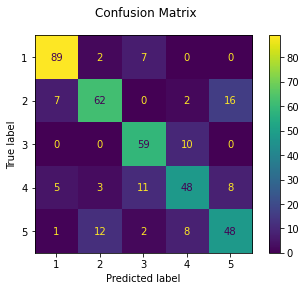

In [9]:
import matplotlib.pyplot as plt

disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [23]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, features, labels, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

In [26]:
print(ergebnis)

[0.7375 0.695  0.73   0.6775 0.755 ]
